## Random Data Generator for Crash Carts Lab:

During COVID there are times when I want to generate 'artificial' data for labs where getting students together to do so would be unwise. When they can generate data individually that is, of course, ideal but I'm finding that sometimes the lab just needs some 'fake' data. 

### Setting up numpy.random

The random number generator in numpy has evolved 'recently'. Note that some students find that the current implementation does not work on their Jupyterlab installation. Not sure if it's a numpy version or a Jupyterlab version that is at the root of the problem. If you are remixing this notebook be aware that there may be issues. 

[numpy.random documentation](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random)

Based on the documentation linked above here is how it starts....

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt

from numpy.random import default_rng
rng = default_rng()

### rng.normal vs rng.standard_normal

The core difference for me is that ```rng.standard_normal``` generates random numbers from a normal distribution with mean 0 and standard deviation 1.0.  Since I would usually like to generate my 'fake' data with different means and different standard deviations I need to use ``` rng.normal``` which allows me to control both the mean and the standard deviation.

[rng.normal docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=random%20normal)

[ring.standard_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html?highlight=random%20normal#numpy.random.standard_normal)

### rng.uniform

When I want to generate data I will have an idea of what I desire for the data values or the slope or some feature of the data. I then want to create data points that are 'scattered' around that desired value of the data. To populate my means of my desired data I will draw randomly from a uniform distribution across a range. Then I will 

[rng.uniform docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html?highlight=random%20uniform#numpy.random.uniform)

### np.absolute

I feel like I want to draw my data variability from a standard distribution but when I pass that data varibility number as a standard deviation it has to be a + value. ```np.absolute``` lets be take the absolute value of every value in the array.

[nop.absolute docs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)

In [11]:
# set up data generation
numDataPts = 6
numDecimals = 2 # number of decimals to keep in final data generated

# sets standard deviation of standard deviation of data - larger => more data scatter
# in some circumstances this can lead to generating unreasonable data due to scatter
# around the mean. (negative data points rarely make sense) Look at the data generated
# adjust appropriately
dataScatter = .3 

# generate data means
meansSlow = rng.uniform(.25, 1.25, numDataPts)
meansFast = rng.uniform(1.25, 2.25, numDataPts)
print("Means of slow data: ",meansSlow)
print("Means of fast data: ",meansFast)

# generate variablility from normal distribution and take magnitude
slowVar = rng.normal(0, dataScatter, numDataPts)
fastVar = rng.normal(0, 1.5*dataScatter, numDataPts)
slowVar = np.absolute(slowVar)
fastVar = np.absolute(fastVar)
print("Variability of slow data: ",slowVar)
print("Variability  of fast data: ",fastVar)

# generate  'fake' data arrays and fill with 0's
dataSlow = np.zeros((numDataPts,numDataPts))
dataFast = np.zeros((numDataPts,numDataPts))

# fill each row of data array with 'noisy data'
for i in range(numDataPts):
    dataSlow[i] = rng.normal(meansSlow[i], slowVar[i], numDataPts)
    dataFast[i] = rng.normal(meansFast[i], fastVar[i], numDataPts)

# round off the data so it looks like data
dataSlow = dataSlow.round(decimals= numDecimals)
dataFast = dataFast.round(decimals= numDecimals)
print("slow data: ",dataSlow)
print("fast data: ",dataFast)



Means of slow data:  [0.95689403 1.10116503 0.72745097 1.18402529 0.64264399 0.25316929]
Means of fast data:  [2.06764775 1.72097244 1.49347096 2.0514605  1.63216025 1.44564454]
Variability of slow data:  [0.46449021 0.24361745 0.13421339 0.03689287 0.37876498 0.26881626]
Variability  of fast data:  [0.39009035 0.06506529 0.34010967 0.5188944  0.1506003  0.33264011]
slow data:  [[ 0.94  1.02  0.92  0.41  1.23  0.29]
 [ 1.09  1.37  1.32  1.07  0.98  0.81]
 [ 0.75  0.55  0.93  1.03  0.69  0.8 ]
 [ 1.15  1.19  1.2   1.09  1.24  1.16]
 [ 0.61  0.38  0.08  0.79 -0.06  0.48]
 [ 0.    0.63  0.23  0.58  0.05  0.15]]
fast data:  [[2.49 2.73 1.96 2.37 1.52 1.85]
 [1.7  1.67 1.76 1.65 1.68 1.62]
 [1.76 2.05 1.34 1.79 1.81 1.36]
 [2.47 1.8  1.58 2.13 2.27 1.56]
 [1.62 1.74 1.34 1.56 1.78 1.21]
 [1.45 1.68 1.81 2.06 1.66 1.75]]


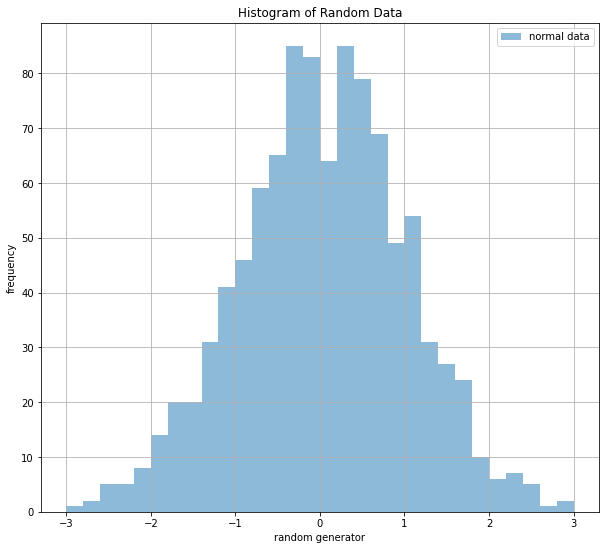

In [13]:
# Choose my number of bins and the range of the histogram again.
num_bins = 30
fullrange = [-3,3]

# Assign particular colors to each data set
data1Color = "tab:blue"
data2Color = "tab:red"

# Explicitly create a figure with a particular plot 'axHist' contained within the figure
figHist, axHist = plt.subplots()
height, bins, patches = axHist.hist(vals,
                                 num_bins,
                                 fullrange,
                                 histtype = "bar",
                                 color=data1Color,
                                 alpha= .5,
                                 label='normal data')

# Set the size of my plot for better visibility
figHist.set_size_inches(10, 9)

# turn on grid lines to help interpretation
axHist.grid()

# Label the figure
plt.xlabel('random generator')
plt.ylabel('frequency')
plt.title('Histogram of Random Data')

# show a legend for what the different parts of the plot mean. The legend grabs the 'lable'
# from each plot command to create this
plt.legend(loc=1)
plt.show()

In [20]:
poissonVals = rng.poisson(3,1000)

#print(poissonVals)


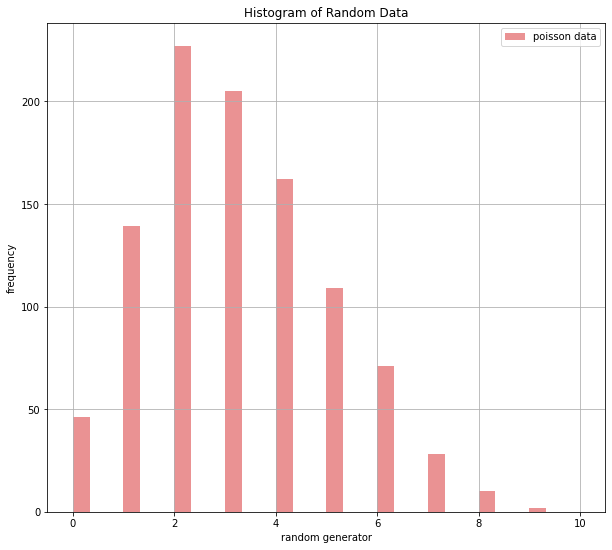

In [25]:
# Choose my number of bins and the range of the histogram again.
num_bins = 30
fullrange = [0,10]

# Assign particular colors to each data set
data1Color = "tab:blue"
data2Color = "tab:red"

# Explicitly create a figure with a particular plot 'axHist' contained within the figure
figHist2, axHist2 = plt.subplots()
height, bins, patches = axHist2.hist(poissonVals,
                                 num_bins,
                                 fullrange,
                                 histtype = "bar",
                                 color=data2Color,
                                 alpha= .5,
                                 label='poisson data')

# Set the size of my plot for better visibility
figHist2.set_size_inches(10, 9)

# turn on grid lines to help interpretation
axHist2.grid()

# Label the figure
plt.xlabel('random generator')
plt.ylabel('frequency')
plt.title('Histogram of Random Data')

# show a legend for what the different parts of the plot mean. The legend grabs the 'lable'
# from each plot command to create this
plt.legend(loc=1)
plt.show()